# **Calculate Value at Risk (VaR) in Risk Management**
With the concept of Monte Carlo Method

There are **3** components to a VaR measurement.           
1) A Time Frame\
2) A Confidence Level\
3) A Loss Amount

## What we are going to do



Here we are showing,\
at **99 % confidence level**, What is the most amount or percentage that can be expected to be **lost** on the investment over **the next week**.

##Import necessary Libraries

In [ ]:
import numpy as np        # Used for numerical calculations easily
import pandas as pd       # Used for building a dataframe
import datetime as dt     # Used for the date-time information
import yfinance as yf     # Used for convenient access to the Yahoo Finance API to download historical stock data
import matplotlib.pyplot as plt
from scipy.stats import norm  # Used for a normal continuous random variable

## Set Time Frame from to a certain number of years

In [ ]:
years = 15                                             # We set 15 years as time frame
endDate = dt.datetime.now()                            # Give today's Date
startDate = endDate - dt.timedelta(days = 365*years)

## Create a list of Tickers
A ticker is a type of stock symbol that describes information about the stock of a company.

In [ ]:
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

# Largest companies of Yahoo Finance

# SPDR S&P 500 ETF Trust - 'SPY'
# Vanguard Total Bond Market Index Fund - 'BND'
# SPDR Gold Shares - 'GLD'
# Invesco QQQ Trust - 'QQQ'
# Vanguard Total Stock Market Index Fund - 'VTI'

## Download the daily adjusted close prices for the tickers

In [ ]:
adj_close_df = pd.DataFrame()

for ticker in tickers:
  data = yf.download(ticker, start = startDate, end = endDate)
  adj_close_df[ticker] = data['Adj Close']
print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2008-09-03   95.489243  49.465004   78.889999   39.499550   48.343330
2008-09-04   92.614403  49.490921   78.389999   38.221416   46.860569
2008-09-05   92.905640  49.529778   78.980003   38.037579   47.139061
2008-09-08   94.824669  49.879559   78.860001   37.967548   47.959465
2008-09-09   92.009590  49.970257   76.489998   37.162151   46.296070
...                ...        ...         ...         ...         ...
2023-08-24  436.890015  71.089996  177.850006  361.220001  217.110001
2023-08-25  439.970001  7

## Calculate the daily log returns and drop any NAs

In [ ]:
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()  # For First Row

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2008-09-04 -0.030569  0.000524 -0.006358 -0.032893 -0.031152
2008-09-05  0.003140  0.000785  0.007498 -0.004821  0.005925
2008-09-08  0.020445  0.007037 -0.001521 -0.001843  0.017254
2008-09-09 -0.030137  0.001817 -0.030514 -0.021441 -0.035299
2008-09-10  0.004050  0.000000 -0.030126  0.008211  0.006643
...              ...       ...       ...       ...       ...
2023-08-24 -0.013956 -0.002389 -0.000225 -0.021607 -0.013496
2023-08-25  0.007025  0.000000 -0.001294  0.007722  0.006794
2023-08-28  0.006321  0.001827  0.002867  0.007499  0.006384
2023-08-29  0.014351  0.006159  0.009721  0.021605  0.014441
2023-08-30  0.004110 -0.000419  0.002499  0.005561  0.004426

[3773 rows x 5 columns]


## Create a function that will be used to calculate portfolio expected return

*We are assuming that future returns are based on past returns which is not a reliable assumption.

In [ ]:
# The expected return is the amount of profit or loss an investor can anticipate receiving on an investment.
# The expected return for a portfolio containing multiple investments is the weighted average of the expected return of each of the investments.

def expected_return(weights, log_returns):
  return np.sum(log_returns.mean()*weights) # For Average return

## Create a function that will be used to calculate portfolio standard deviation

In [ ]:
def standard_deviation (weights, cov_matrix):
  variance = weights.T @ cov_matrix @ weights  # We convert Transpose matrix then multiply
  return np.sqrt(variance) # Standard Deviation


## Create a covariance matrix for all the securities

In [ ]:
# A covariance matrix takes into accout the covariances and correlations of every single stock within the portfolio and correlations with each other
cov_matrix = log_returns.cov()
print(cov_matrix)

              SPY           BND       GLD           QQQ           VTI
SPY  1.673430e-04  2.000823e-07  0.000007  1.714180e-04  1.680282e-04
BND  2.000823e-07  1.074542e-05  0.000009 -7.844535e-08  1.348427e-07
GLD  7.323669e-06  8.744443e-06  0.000118  6.335888e-06  8.506707e-06
QQQ  1.714180e-04 -7.844535e-08  0.000006  2.044555e-04  1.734894e-04
VTI  1.680282e-04  1.348427e-07  0.000009  1.734894e-04  1.708027e-04


## Create an equally weighted portfolio and find total portfolio expected return and standard deviation

In [ ]:
portfolio_value = 1000000  # 1 Million Dollars
weights = np.array([1/len(tickers)]*len(tickers))  # 20 % each as there are 5 tickers
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

# Create a function that gives a random Z-score based on normal distribution

In [ ]:
# In a normal distribution the (mean is zero) and the (standard deviation is 1).
# Z-score is a metric that reveals how likely a company is going to be bankrupt or insolvent

#Z score acts as a multiplier on the standard deviation value and it's what determines the confidence level that we are using for our value at risk.
#Here we have value at risk with a 99 percent confidence and it's the z score itself that determines that confidence level

def random_z_score():
  return np.random.normal(0,1)

## Create a function to calculate Scenario Gain Loss

In [ ]:
days = 30    # VaR is always calculated on certain number of time period

def  scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
  return portfolio_value*portfolio_expected_return*days + portfolio_value*portfolio_std_dev*z_score*np.sqrt(days)

# (Typical Expected return) - (adding either negative or positive based on Z-scores )

# Run 10,000 Simulations with Monte Carlo Method

In [ ]:
simulations = 10000
scenarioReturn = []

for i in range(simulations):
  z_score = random_z_score()
  scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

## Specify a confidence interval and calculate the Value at Risk (VaR)

In [ ]:
# The higher we set our confidence interval the greater our value at risk will be
# because we will move further out into the tail of the distribution

confidence_interval = 0.99   # 99 %
VaR = -np.percentile(scenarioReturn, 100*(1 - confidence_interval))
print(VaR)


97373.86677156267


## Plot the results of all 10000 scenarios

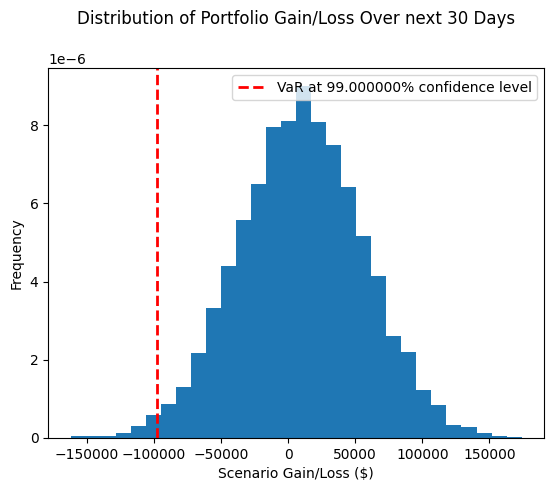

In [ ]:
plt.hist(scenarioReturn, bins = 30, density = True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over next {days} Days\n')
plt.axvline(-VaR, color = 'r', linestyle = 'dashed', linewidth = 2, label = f'VaR at {confidence_interval:0%} confidence level')
plt.legend()
plt.show()
